In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix,
    precision_recall_curve
)
from sklearn.preprocessing import StandardScaler
import numpy as np

Imported all the libraries

In [2]:
df = pd.read_csv("C:/Users/Admin.ROBERT-LENOVO-T/Desktop/M4S4/train.csv")

Loaded the data

In [3]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

Basic EDA

In [4]:
df.fillna(df.median(numeric_only=True), inplace=True)
print("Remaining missing values:", df.isnull().sum().sum())

Remaining missing values: 0


Handle Missing Values

In [5]:
df['sex'] = df['sex'].map({'M': 1, 'F': 0})
df['is_smoking'] = df['is_smoking'].map({'YES': 1, 'NO': 0})

Encode Categorical Variables

In [6]:
df = df.drop(columns=['id'])

Drop Irrelevant Columns

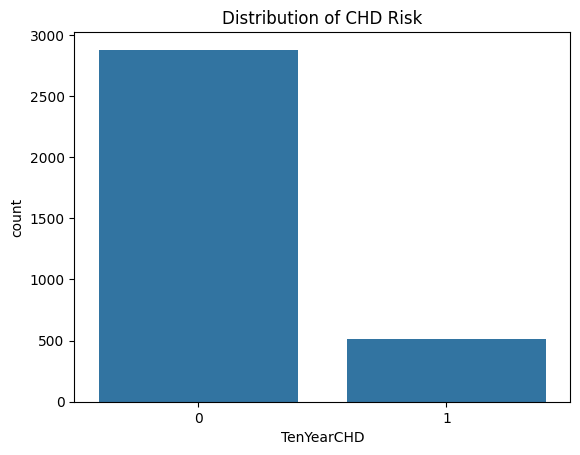

In [7]:
sns.countplot(data=df, x='TenYearCHD')
plt.title("Distribution of CHD Risk")
plt.show()

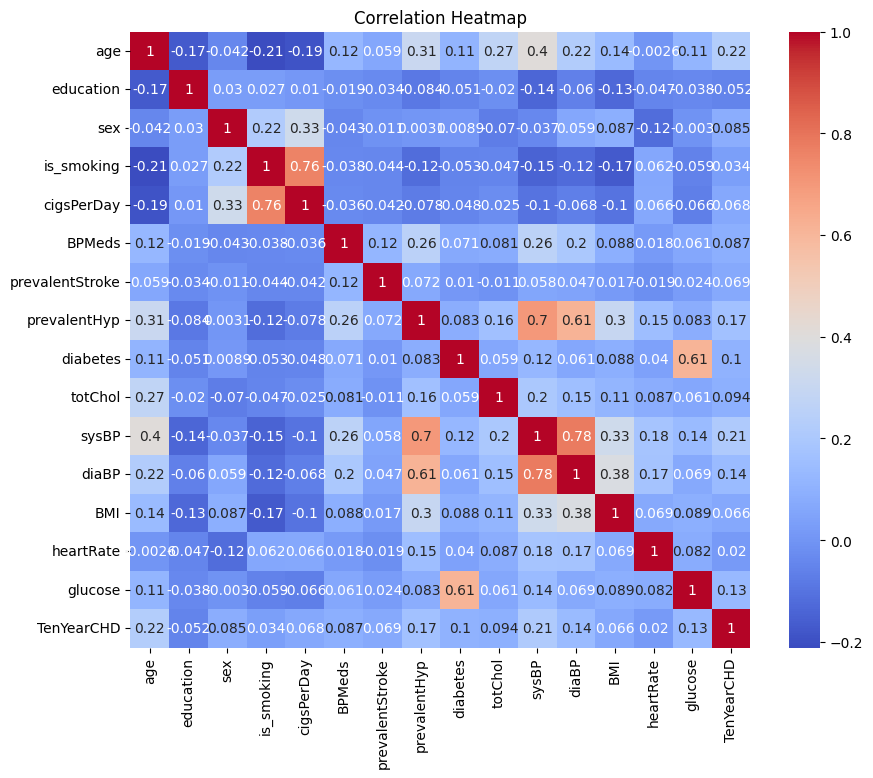

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Visuals

In [9]:
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

Feature & Target Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

Train-Test Split with Stratification

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Feature Scaling

In [12]:
model = LogisticRegression(max_iter=50000, class_weight='balanced')
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=50000)

Logistic Regression with Class Weights

In [14]:
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

Probabilities

In [15]:
y_pred_label = (y_pred_prob >= 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred_label))
print("Precision:", precision_score(y_test, y_pred_label))
print("Recall:", recall_score(y_test, y_pred_label))
print("F1-score:", f1_score(y_test, y_pred_label))
print("ROC AUC:", roc_auc_score(y_test, y_pred_prob))

Accuracy: 0.7094395280235988
Precision: 0.2907488986784141
Recall: 0.6470588235294118
F1-score: 0.4012158054711246
ROC AUC: 0.7217286220043573


Evaluate Default Threshold (0.5)

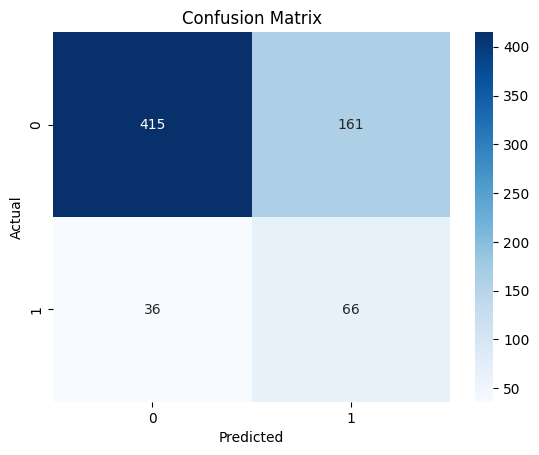

In [16]:
sns.heatmap(confusion_matrix(y_test, y_pred_label), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Confusion Matrix Visualization

In [17]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
optimal_idx = f1_scores.argmax()
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold for F1-score: {optimal_threshold:.2f}")

Optimal Threshold for F1-score: 0.54


Precision-Recall Curve & Optimal Threshold


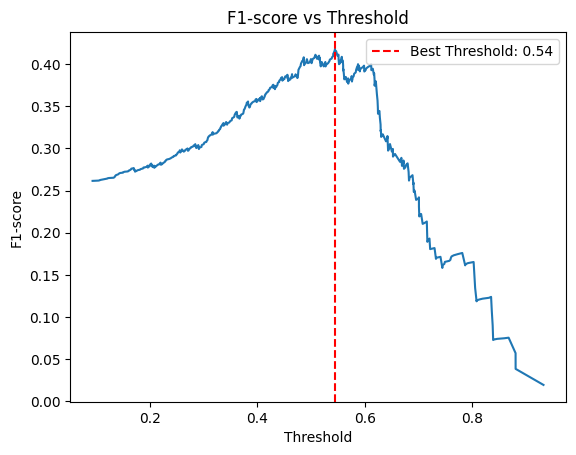

In [18]:
plt.plot(thresholds, f1_scores[:-1])
plt.axvline(optimal_threshold, color='red', linestyle='--', label=f'Best Threshold: {optimal_threshold:.2f}')
plt.title('F1-score vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1-score')
plt.legend()
plt.show()

Plot F1 vs. Threshold

In [20]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df)

            Feature  Coefficient
0               age     0.503332
10            sysBP     0.309627
4        cigsPerDay     0.244453
2               sex     0.212126
14          glucose     0.134872
9           totChol     0.130160
3        is_smoking     0.115715
7      prevalentHyp     0.105092
8          diabetes     0.063997
13        heartRate    -0.058925
6   prevalentStroke     0.057818
11            diaBP     0.043678
5            BPMeds     0.014781
12              BMI     0.004127
1         education    -0.000566


Feature Importance (Logistic Coefficients)

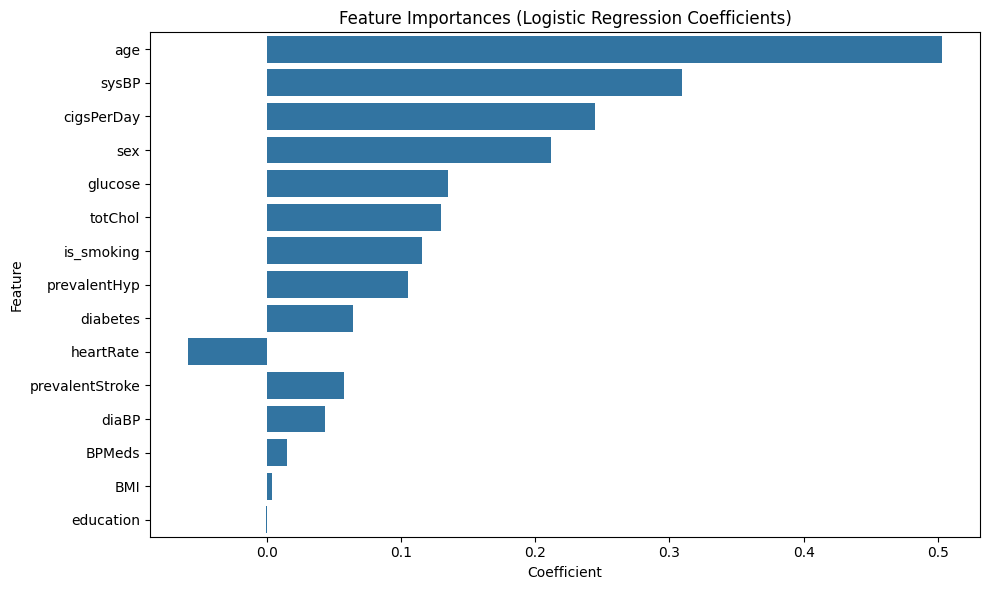

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Feature Importances (Logistic Regression Coefficients)')
plt.tight_layout()
plt.show()

Optional: Plot Feature Coefficients

In [22]:
cv_f1_scores = cross_val_score(model, scaler.transform(X), y, cv=5, scoring='f1')
print(f"Cross-Validated F1-scores: {cv_f1_scores}")
print(f"Mean F1-score: {cv_f1_scores.mean():.4f}")

Cross-Validated F1-scores: [0.37288136 0.33766234 0.41071429 0.34594595 0.40217391]
Mean F1-score: 0.3739


Cross-Validation F1-score